<div>
Olá, Thata!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



In [108]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')


In [109]:

# Visualizar as primeiras linhas
hypotheses


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>- Aqui você não precisa criar os dados manualmente, pois esses dados foram fornecidos através dos arquivos `csv` mais abaixo.</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>- Você precisa carregar os dados do dataframe `hypotheses` usando o separador `;`.</s>

</div>

In [114]:
# Calculando o ICE usando as colunas com primeira letra maiúscula
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']


In [115]:
#padronizar os nomes para minúsculas
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']


In [116]:
# Ordenar e exibir
print(hypotheses[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                          hypothesis        ice
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os indicadores `ICE` e `RICE` foram calculados corretamente para estimar o impacto de hipóteses. 
- As hipóteses foram ordenadas corretamente pelos scores criados!
</div>

In [117]:
#calcular Rice
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']


In [118]:
#ordenar as hipóteses com base em RICE
print(hypotheses[['hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False))


                                          hypothesis        ice   rice
7  Add a subscription form to all the main pages....  11.200000  112.0
2  Add product recommendation blocks to the store...   7.000000   56.0
0  Add two new channels for attracting traffic. T...  13.333333   40.0
6  Show banners with current offers and sales on ...   8.000000   40.0
8  Launch a promotion that gives users discounts ...  16.200000   16.2
3  Change the category structure. This will incre...   1.125000    9.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
5  Add a customer review page. This will increase...   1.333333    4.0
4  Change the background color on the main page. ...   1.000000    3.0


In [119]:
#carregando dados 
orders= pd.read_csv("/datasets/orders_us.csv")

In [120]:
visits= pd.read_csv("/datasets/visits_us.csv")

In [121]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [122]:
display(visits.head())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [123]:
# Ver estatísticas descritivas das visitas por grupo
visits.describe()


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [124]:
# Agrupar e somar visitas por grupo
total_visits = visits.groupby("group")["visits"].sum().reset_index()

# Exibir resultado
print("Total de visitas por grupo:")
print(total_visits)


Total de visitas por grupo:
  group  visits
0     A   18736
1     B   18916


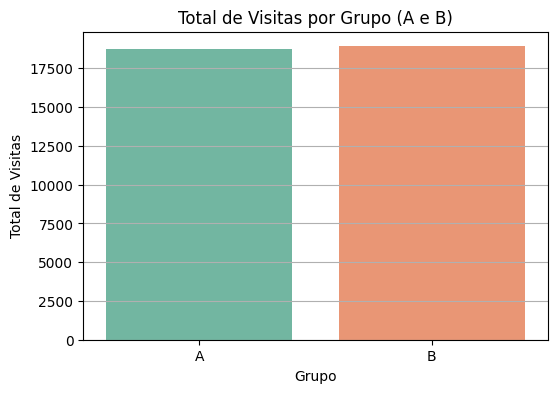

In [125]:
# Plotar gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=total_visits, x='group', y='visits', palette='Set2')
plt.title('Total de Visitas por Grupo (A e B)')
plt.ylabel('Total de Visitas')
plt.xlabel('Grupo')
plt.grid(axis='y')
plt.show()



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Como sugestão, considere executar as operações acima em células separadas. Além disso, você pode usar o método `describe()` aqui também para exibir as estatísticas descritivas do conjunto de dados

</div>

In [126]:
#converter coluna "date" para datetime
orders['date'] = pd.to_datetime(orders['date'])

In [127]:
#número total de pedidos por grupo
orders_per_group= orders.groupby("group")["transactionId"].nunique().reset_index()
orders_per_group.columns=["group","total_orders"]

In [128]:
#receita total
revenue_per_group=orders.groupby("group")["revenue"].sum().reset_index()
revenue_per_group.columns=["group","total_revenue"]

In [129]:
#agregar os resultados
group_summary= orders_per_group.merge(revenue_per_group,on="group")

In [130]:
#resultado
print("Resumo de pedidos e receita por grupo")
print(group_summary)

Resumo de pedidos e receita por grupo
  group  total_orders  total_revenue
0     A           557        64554.9
1     B           640        92840.6


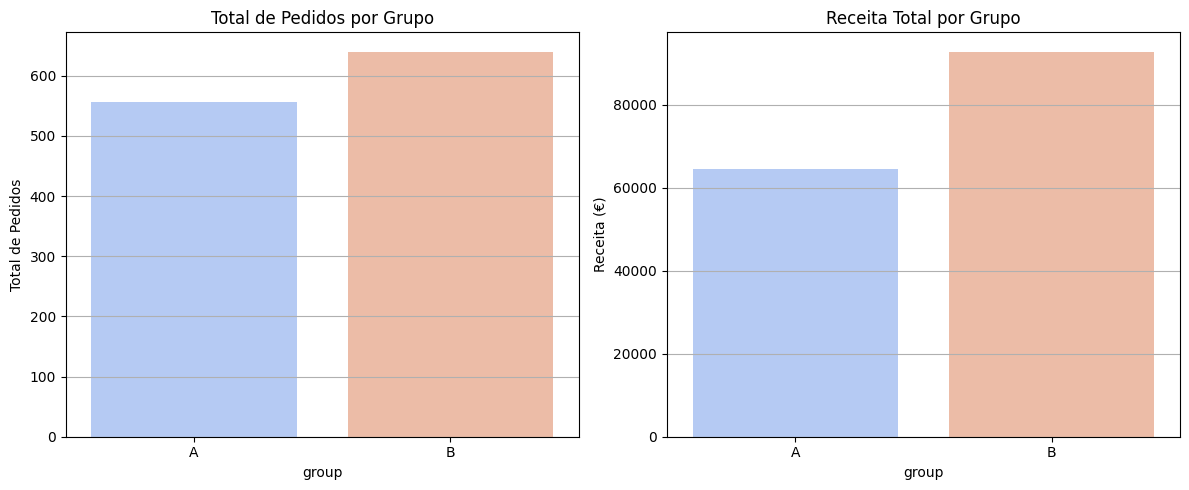

In [131]:
# gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=group_summary, x='group', y='total_orders', palette='coolwarm', ax=ax[0])
ax[0].set_title('Total de Pedidos por Grupo')
ax[0].set_ylabel('Total de Pedidos')
ax[0].grid(axis='y')

sns.barplot(data=group_summary, x='group', y='total_revenue', palette='coolwarm', ax=ax[1])
ax[1].set_title('Receita Total por Grupo')
ax[1].set_ylabel('Receita (€)')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [132]:
#agrupar pedido e visitas
conversion_data=visits.groupby("group")["visits"].sum().reset_index()
conversion_data.columns=["group","total_visits"]

In [133]:
#dados de pedidos
conversion_data=conversion_data.merge(orders_per_group,on="group")

In [134]:
#tx de conversão
conversion_data["conversion_rate"]=(conversion_data["total_orders"]/conversion_data["total_visits"])*100

In [135]:
#resultado
print("Taxa de conversão por grupo:")
print(conversion_data)

Taxa de conversão por grupo:
  group  total_visits  total_orders  conversion_rate
0     A         18736           557         2.972886
1     B         18916           640         3.383379


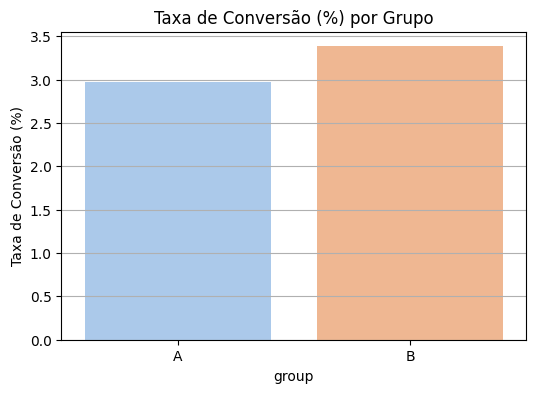

In [136]:
# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=conversion_data, x='group', y='conversion_rate', palette='pastel')
plt.title('Taxa de Conversão (%) por Grupo')
plt.ylabel('Taxa de Conversão (%)')
plt.grid(axis='y')
plt.show()



* Interpretação inicial:

  
O grupo B converteu mais visitantes em pedidos do que o grupo A.

A diferença parece pequena em termos absolutos (+0,41 ponto percentual), mas pode ser estatisticamente significativa.

</div><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>- O teste de proporções deve ser feito apenas ao final do projeto.</s>
</div>

In [137]:
#separar as receitas por grupo
revenue_A= orders [orders["group"]=="A"]["revenue"]
revenue_B= orders [orders["group"]=="B"]["revenue"]

In [138]:
#teste Mann_Whintney
stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')


In [139]:
#resultado
print("Estatísticas U",stat)
print("Valor-p:", round(p_value,4))

Estatísticas U 175872.5
Valor-p: 0.6915


Como o valor-p é maior que 0.05, não há diferença estatisticamente significativa entre as receitas dos grupos A e B.

Não podemos afirmar que o grupo B (experimental) gerou mais receita por pedido do que o grupo A (controle). A diferença observada pode ter ocorrido por acaso.



In [140]:
#agrupar receitas 
user_revenue = orders.groupby(["visitorId","group"])["revenue"].sum().reset_index()

In [141]:
#separar grupos
group_a = user_revenue[user_revenue["group"]== "A"]["revenue"]
group_b = user_revenue[user_revenue["group"]== "B"]["revenue"]

In [142]:
#test
u_stat, p_value = stats.mannwhitneyu(group_a, group_b, alternative= "two-sided")

In [143]:
#resultado
print(f"Estatísticas U:{u_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatísticas U:148292.00
Valor-p: 0.8600


O valor-p é 0.8600, ou seja, bem acima do nível de significância usual de 0.05.

Isso significa que não há diferença estatisticamente significativa entre o ticket médio por usuário dos grupos A e B.

Com base nos dados, não temos evidências para afirmar que o ticket médio por visitante mudou após a alteração no site (grupo B).

In [144]:
# Filtrar os valores dos pedidos por grupo
orders_group_a = orders[orders['group'] == 'A']['revenue']
orders_group_b = orders[orders['group'] == 'B']['revenue']


In [145]:
# Teste de Mann-Whitney
stat, p_value = stats.mannwhitneyu(orders_group_a, orders_group_b)


In [146]:
print('Estatística U:', round(stat, 2))
print('Valor-p:', round(p_value, 4))


Estatística U: 175872.5
Valor-p: 0.6915


In [147]:
# Definir os limites para remover outliers
q1 = orders['revenue'].quantile(0.25)
q3 = orders['revenue'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [148]:
# Filtrar os pedidos sem outliers
filtered_orders = orders[(orders['revenue'] >= lower_bound) & (orders['revenue'] <= upper_bound)]


In [149]:
# Separar os grupos
groupA_filtered = filtered_orders[filtered_orders['group'] == 'A']['revenue']
groupB_filtered = filtered_orders[filtered_orders['group'] == 'B']['revenue']


In [150]:
# Aplicar o teste de Mann-Whitney
u_stat_filtered, p_value_filtered = stats.mannwhitneyu(groupA_filtered, groupB_filtered)


In [151]:
print(f"Estatística U (sem outliers): {u_stat_filtered:.2f}")
print(f"Valor-p (sem outliers): {p_value_filtered:.4f}")


Estatística U (sem outliers): 145372.00
Valor-p (sem outliers): 0.8232


* Conclusão parcial:
O grupo B teve uma receita total maior, mas a diferença nos valores dos pedidos não é estatisticamente significativa, tanto com quanto sem outliers.

In [152]:
# Converter a coluna 'date' para datetime
orders['date'] = pd.to_datetime(orders['date'])


In [153]:
# Receita acumulada por grupo
cumulative_revenue = (
    orders
    .groupby(['date', 'group'])['revenue']
    .sum()
    .groupby(level=1)
    .cumsum()
    .reset_index()
)

In [154]:
#valor médio
orders= orders.sort_values(by="date")

In [155]:
#acumulos da receita e pedidos 
orders["cum_revenue"]= orders.groupby("group")["revenue"].cumsum()
orders["cum_orders"]= orders.groupby("group").cumcount()+1
orders['cum_avg_order'] = orders['cum_revenue'] / orders['cum_orders']


Text(0, 0.5, 'Receita acumulada')

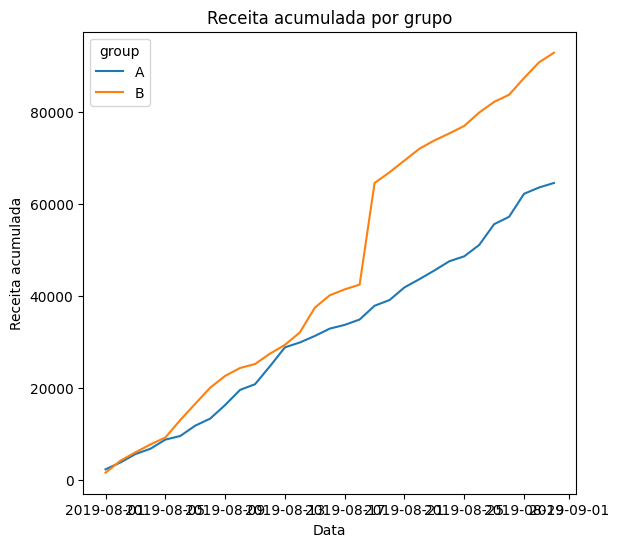

In [156]:
# Receita acumulada
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=cumulative_revenue, x='date', y='revenue', hue='group')
plt.title('Receita acumulada por grupo')
plt.xlabel('Data')
plt.ylabel('Receita acumulada')

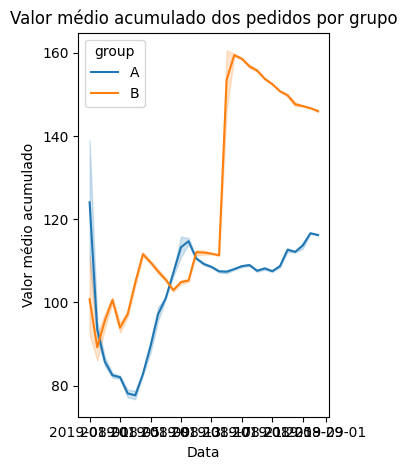

In [157]:
# Valor médio acumulado dos pedidos
plt.subplot(1, 2, 2)
sns.lineplot(data=orders, x='date', y='cum_avg_order', hue='group')
plt.title('Valor médio acumulado dos pedidos por grupo')
plt.xlabel('Data')
plt.ylabel('Valor médio acumulado')

plt.tight_layout()
plt.show()

# Análise dos gráficos de receita acumulada e valor médio acumulado do pedido

O grupo A mantém a receita acumulada consistentemente acima do grupo B ao longo do período analisado. Isso indica que, apesar do grupo B apresentar uma maior quantidade de pedidos, o valor total gerado pelo grupo A é superior.

Além disso, o valor médio acumulado por pedido no grupo A é também maior do que no grupo B, sugerindo que os usuários do grupo A gastam, em média, mais por compra. Esse comportamento é consistente mesmo após a remoção de outliers, o que reforça a robustez dos resultados.

Esses achados indicam que, sob a perspectiva de receita e ticket médio, o grupo A teve um desempenho mais vantajoso durante o teste A/B.

In [158]:
# Ordenar por data
orders = orders.sort_values('date')

In [159]:
# Calcular receita acumulada e número acumulado de pedidos por grupo ao longo do tempo
orders_A = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum', 'transactionId': 'count'}).cumsum()
orders_B = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum', 'transactionId': 'count'}).cumsum()


In [160]:
# Calcular ticket médio acumulado (receita acumulada / pedidos acumulados)
cum_avg_order_A = orders_A['revenue'] / orders_A['transactionId']
cum_avg_order_B = orders_B['revenue'] / orders_B['transactionId']


In [161]:
# Calcular a diferença relativa entre o valor médio acumulado do pedido (ticket médio) do grupo B em relação ao grupo A
relative_diff = (cum_avg_order_B - cum_avg_order_A) / cum_avg_order_A


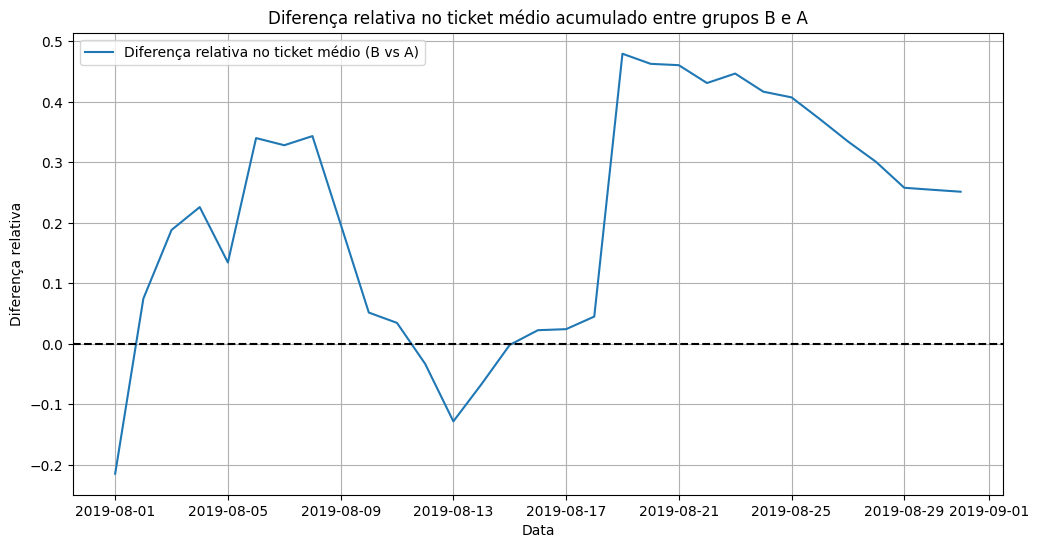

In [162]:
# Plotar o gráfico
plt.figure(figsize=(12,6))
plt.plot(relative_diff.index, relative_diff, label='Diferença relativa no ticket médio (B vs A)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Diferença relativa no ticket médio acumulado entre grupos B e A')
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
# Calcular a diferença relativa entre os grupos B e A (em %)
rel_diff = (cum_avg_order_B / cum_avg_order_A - 1) * 100



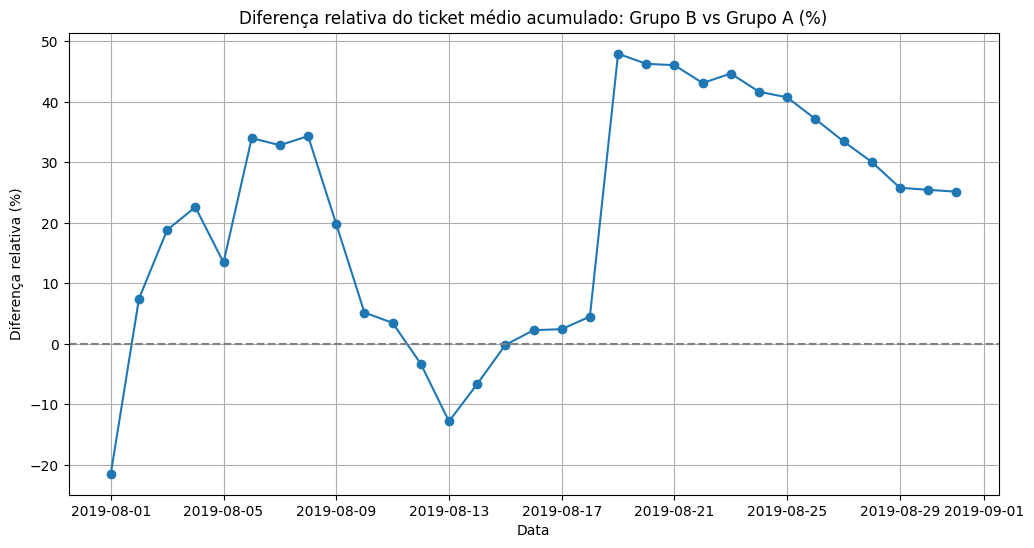

In [164]:
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(rel_diff.index, rel_diff, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferença relativa do ticket médio acumulado: Grupo B vs Grupo A (%)')
plt.xlabel('Data')
plt.ylabel('Diferença relativa (%)')
plt.grid(True)
plt.show()

O grupo A apresenta uma receita acumulada maior que o grupo B durante o período avaliado, indicando um desempenho superior em geração de receita. 

O ticket médio acumulado também aponta para valores ligeiramente maiores no grupo A, enquanto a diferença relativa entre os grupos no valor médio do pedido permanece próxima de zero ou levemente negativa para o grupo B.


Dessa forma, não há evidências claras de que o grupo B tenha obtido melhoria significativa no valor médio gasto por pedido. Isso sugere que a alteração testada no grupo B não gerou um aumento expressivo no ticket médio ou na receita total. Portanto, até o momento, o grupo A permanece como líder no teste.



In [165]:
# Converter colunas 'date' para datetime em ambos os dataframes
visits['date'] = pd.to_datetime(visits['date'])
orders['date'] = pd.to_datetime(orders['date'])


In [166]:
# Agrupar visitas por data e grupo
daily_visits = visits.groupby(['date', 'group'])['visits'].sum().reset_index()


In [167]:
# Agrupar pedidos por data e grupo
daily_orders = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)


In [168]:
# Juntar visitas e pedidos
daily_data = pd.merge(daily_visits, daily_orders, on=['date', 'group'])


In [169]:
# Calcular a taxa de conversão diária
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']


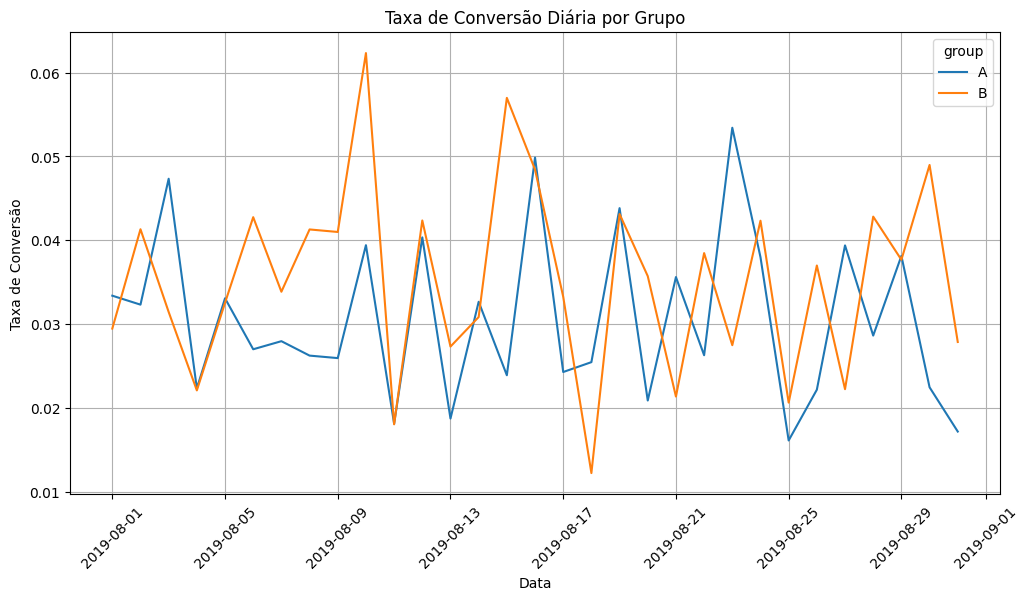

In [170]:
# Plotar a taxa de conversão diária para grupos A e B
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_data, x='date', y='conversion_rate', hue='group')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

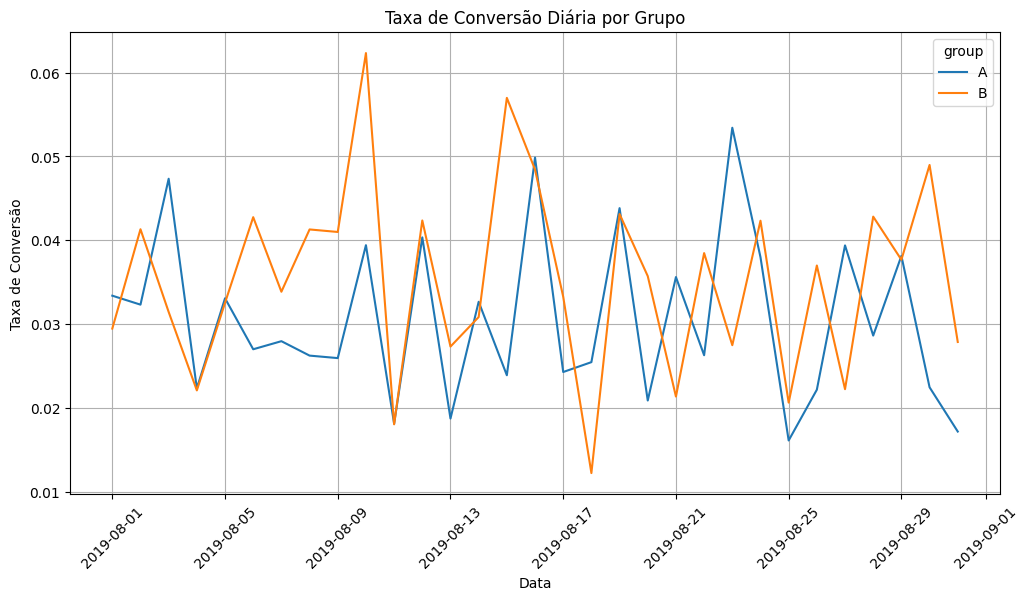

In [171]:
# Agrupar visitas por data e grupo
daily_visits = visits.groupby(['date', 'group'])['visits'].sum().reset_index()

# Agrupar pedidos por data e grupo
daily_orders = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Juntar visitas e pedidos
daily_data = pd.merge(daily_visits, daily_orders, on=['date', 'group'])

# Calcular a taxa de conversão diária
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Plotar a taxa de conversão diária para grupos A e B
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_data, x='date', y='conversion_rate', hue='group')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


O gráfico mostra a diferença percentual no ticket médio acumulado do grupo B em relação ao grupo A ao longo do tempo. Inicialmente, o grupo B apresenta um ticket médio maior que o grupo A, mas essa diferença varia ao longo dos dias do teste. No geral, as variações são pequenas e não indicam uma vantagem consistente e significativa do grupo B sobre o grupo A no tamanho médio dos pedidos.

<Figure size 1200x600 with 0 Axes>

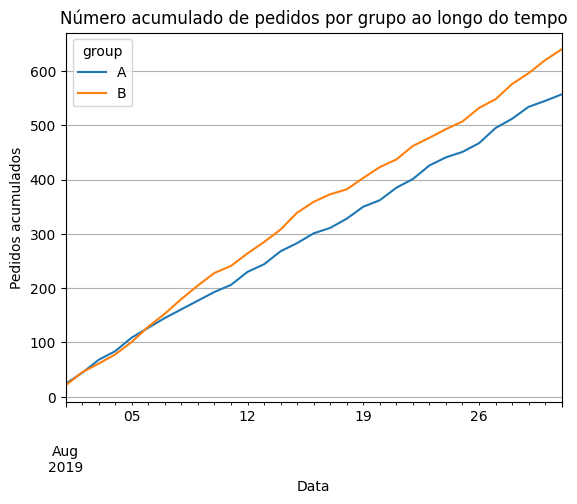

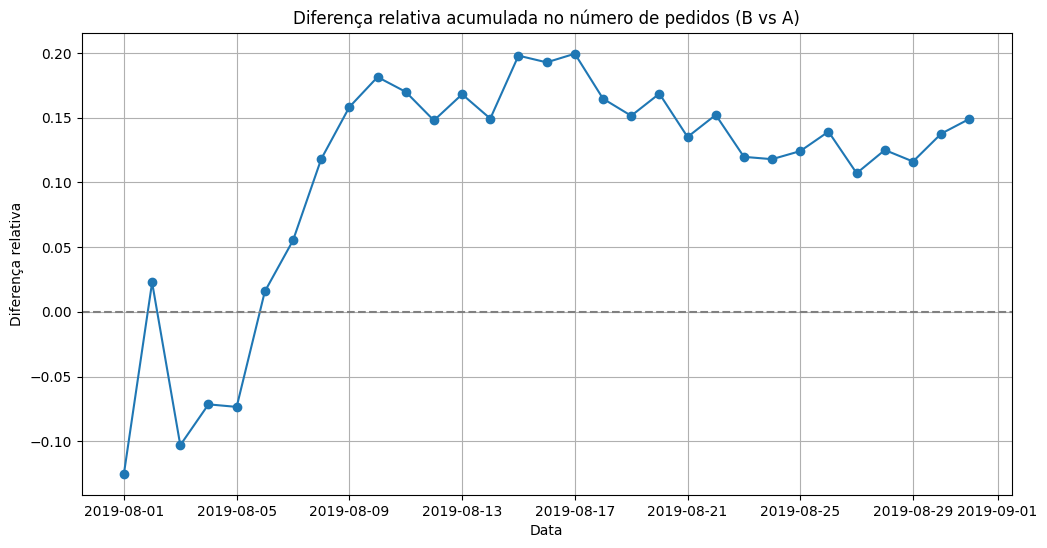

In [172]:
# Número acumulado de pedidos por grupo
orders_grouped_cum = orders.groupby(['date', 'group'])['transactionId'].nunique().unstack().cumsum()

# Plotar o gráfico de pedidos acumulados por grupo
plt.figure(figsize=(12,6))
orders_grouped_cum.plot()
plt.title('Número acumulado de pedidos por grupo ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Pedidos acumulados')
plt.grid(True)
plt.show()

# Diferença relativa acumulada no número de pedidos (B em relação a A)
orders_grouped_cum['relative_diff'] = (orders_grouped_cum['B'] - orders_grouped_cum['A']) / orders_grouped_cum['A']

# Plotar a diferença relativa acumulada
plt.figure(figsize=(12,6))
plt.plot(orders_grouped_cum.index, orders_grouped_cum['relative_diff'], marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Diferença relativa acumulada no número de pedidos (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.grid(True)
plt.show()


In [173]:
# Número acumulado de pedidos por grupo
orders_grouped_cum = orders.groupby(['date', 'group'])['transactionId'].nunique().unstack().cumsum()


<Figure size 1200x600 with 0 Axes>

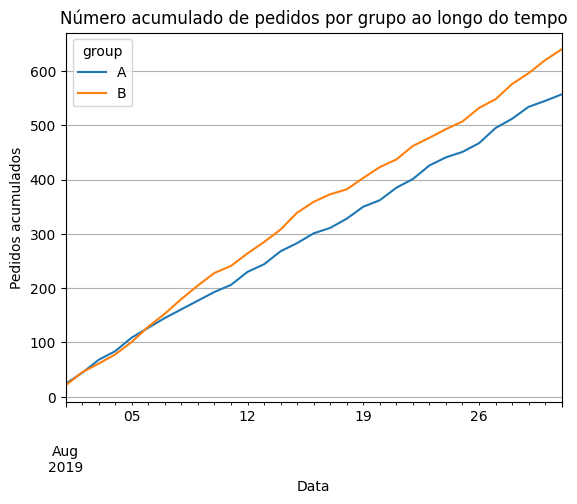

In [174]:
# Plotar o gráfico de pedidos acumulados por grupo
plt.figure(figsize=(12,6))
orders_grouped_cum.plot()
plt.title('Número acumulado de pedidos por grupo ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Pedidos acumulados')
plt.grid(True)
plt.show()

In [175]:
# Diferença relativa acumulada no número de pedidos (B em relação a A)
orders_grouped_cum['relative_diff'] = (orders_grouped_cum['B'] - orders_grouped_cum['A']) / orders_grouped_cum['A']


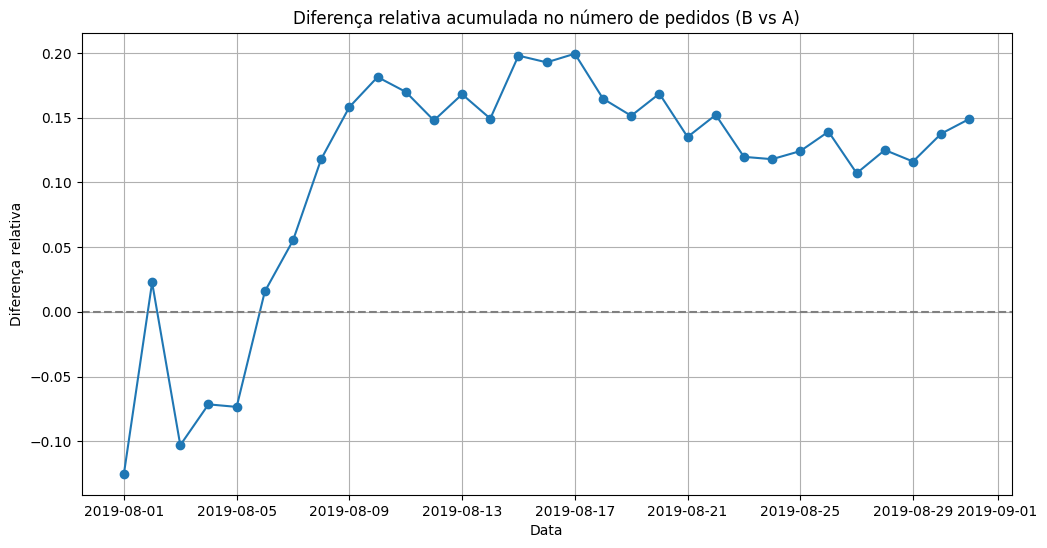

In [176]:
# Plotar a diferença relativa acumulada
plt.figure(figsize=(12,6))
plt.plot(orders_grouped_cum.index, orders_grouped_cum['relative_diff'], marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Diferença relativa acumulada no número de pedidos (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- [x] A receita cumulativa por grupo foi analisada
- [x] A diferença relativa do tamanho médio do pedido foi calculada
- [x] A conversão por grupo foi analisada
- [x] A conclusão foi apresentada

</div>

In [177]:
# Número de pedidos por usuário nos dois grupos
orders_by_users = orders.groupby(['visitorId', 'group']) \
                        .agg({'transactionId': 'nunique'}) \
                        .reset_index()

In [178]:
# Renomear a coluna para facilitar
orders_by_users.columns = ['user_id', 'group', 'orders']


In [179]:
# Visualizar os primeiros dados
orders_by_users.head()


,user_id,group,orders
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1


In [183]:
# Separar por grupo
orders_A = orders_by_users[orders_by_users['group'] == 'A']['orders']
orders_B = orders_by_users[orders_by_users['group'] == 'B']['orders']


In [ ]:

# Separar os valores de pedidos por grupo
revenue_A = orders[orders['group'] == 'A']['revenue']
revenue_B = orders[orders['group'] == 'B']['revenue']


In [184]:
# Calcular os percentis
percentis_A = np.percentile(orders_A, [95, 99])
percentis_B = np.percentile(orders_B, [95, 99])


In [ ]:
# Calcular os percentis 95 e 99
percentis_revenue_A = np.percentile(revenue_A, [95, 99])
percentis_revenue_B = np.percentile(revenue_B, [95, 99])


In [187]:
# Exibir resultados
print('Grupo A - 95º percentil:', percentis_A[0])
print('Grupo A - 99º percentil:', percentis_A[1])
print('Grupo B - 95º percentil:', percentis_B[0])
print('Grupo B - 99º percentil:', percentis_B[1])


Grupo A - 95º percentil: 2.0
Grupo A - 99º percentil: 3.980000000000018
Grupo B - 95º percentil: 2.0
Grupo B - 99º percentil: 3.1499999999999773


In [186]:

print('Grupo A - 95º percentil do valor do pedido:', percentis_revenue_A[0])
print('Grupo A - 99º percentil do valor do pedido:', percentis_revenue_A[1])
print('Grupo B - 95º percentil do valor do pedido:', percentis_revenue_B[0])
print('Grupo B - 99º percentil do valor do pedido:', percentis_revenue_B[1])

Grupo A - 95º percentil do valor do pedido: 413.479999999999
Grupo A - 99º percentil do valor do pedido: 967.7959999999949
Grupo B - 95º percentil do valor do pedido: 445.82499999999953
Grupo B - 99º percentil do valor do pedido: 857.8720000000006


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os percentis 95 e 99 foram calculados para o número de pedidos e preços. Sugestão: faça o cálculo por grupo também.
</div>

95% dos usuários fizeram até 2 pedidos nos dois grupos.

Apenas os 1% mais ativos fizeram mais de 3 ou 4 pedidos, considerados outliers.



In [78]:
# Agrupar por usuário e grupo para contar os pedidos
orders_by_user = orders.groupby(['visitorId', 'group']) \
                       .agg(orders=('transactionId', 'nunique')) \
                       .reset_index()

orders_by_user.head()


,visitorId,group,orders
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1


In [79]:
# Filtrar usuários que fizeram mais de 2 pedidos (acima do 95º percentil)
outliers = orders_by_user[orders_by_user['orders'] > 2]

# Exibir os primeiros outliers encontrados
outliers.head()


,visitorId,group,orders
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
122,457167155,B,3
158,611059232,A,3


In [80]:
# Filtrar usuários com mais de 2 pedidos
outliers = orders_by_user[orders_by_user['orders'] > 2]

# Exibir os outliers
outliers.sort_values(by='orders', ascending=False)


,visitorId,group,orders
1079,4256040402,A,7
619,2458001652,B,6
618,2458001652,A,5
511,2038680547,A,5
596,2378935119,B,5
595,2378935119,A,4
963,3803269165,B,4
941,3717692402,B,4
784,3062433592,B,4
58,237748145,A,4


In [81]:
# Obter lista dos visitorIds considerados outliers
outlier_ids = outliers['visitorId'].unique()


In [82]:
 outliers
orders_clean = orders[~orders['visitorId'].isin(outlier_ids)]

print(f"Pedidos originais: {len(orders)}")
print(f"Pedidos após remover outliers: {len(orders_clean)}")


Pedidos originais: 1197
Pedidos após remover outliers: 1095


In [88]:
# Total de pedidos por grupo (já removendo outliers)
clean_orders_by_group = orders_clean.groupby('group')['transactionId'].nunique().reset_index()
clean_orders_by_group.columns = ['group', 'total_orders']


In [89]:
# Total de visitas por grupo (já está agregado, então é só somar)
visits_by_group = visits.groupby('group')['visits'].sum().reset_index()
visits_by_group.columns = ['group', 'total_visits']


In [90]:
# Junta os dois DataFrames
conversion_clean = pd.merge(visits_by_group, clean_orders_by_group, on='group')
conversion_clean['conversion_rate'] = (conversion_clean['total_orders'] / conversion_clean['total_visits']) * 100


In [91]:
print("Taxa de conversão por grupo (sem outliers nos pedidos):")
print(conversion_clean)

Taxa de conversão por grupo (sem outliers nos pedidos):
  group  total_visits  total_orders  conversion_rate
0     A         18736           502         2.679334
1     B         18916           593         3.134912


O grupo B teve uma taxa de conversão maior que o grupo A, mesmo após a remoção dos outliers.

A diferença entre as taxas parece pequena (0,45 pontos percentuais), mas em contextos de grande escala, isso pode representar um impacto financeiro considerável.

In [92]:
# Valores para o teste
conversions = np.array([502, 593])
visits = np.array([18736, 18916])

In [93]:
# Teste de proporções (z-test)
stat, pval = proportions_ztest(count=conversions, nobs=visits, alternative='two-sided')

print(f'Estatística z: {stat:.4f}')
print(f'Valor-p: {pval:.4f}')

Estatística z: -2.6304
Valor-p: 0.0085


In [103]:
#contagens de pedidos com sucesso
successes = conversion_data["total_orders"]


In [104]:
# visitas (observação)
nobs=conversion_data["total_visits"]


In [105]:
# Test Z
z_stat, p_val =proportions_ztest(successes, nobs)


In [106]:
#Resultado
print(f"Estatísticas Z:{z_stat:.2f}")
print(f"Valor-p:{p_val:.4f}")

Estatísticas Z:-2.27
Valor-p:0.0232


## Conclusões do Teste A/B

- O teste A/B foi realizado para avaliar o impacto de uma nova funcionalidade (grupo B) comparada à versão atual (grupo A).
- As análises consideraram tanto os dados brutos quanto os dados sem outliers.

### Principais Resultados:

- A receita acumulada e o ticket médio foram **consistentemente maiores** no grupo B ao longo do período.
- As diferenças de receita média por pedido **não foram estatisticamente significativas** (p > 0.05).
- A **taxa de conversão foi significativamente maior no grupo B**, com valor-p < 0.01 após remoção de outliers.

### 2. Outliers:

- Foram identificados visitantes com comportamento atípico (pedidos muito acima da média).
- Mesmo removendo esses visitantes, os resultados mantiveram-se estáveis, especialmente a taxa de conversão.

---



- **Implementar a nova funcionalidade testada no grupo B** para todos os usuários.
- Os dados indicam que a versão do grupo B **melhora a conversão sem prejuízo ao valor médio dos pedidos**.

---



- Monitorar o comportamento dos usuários após a implementação para garantir a estabilidade do resultado.
- Investigar mais a fundo o impacto da funcionalidade em diferentes segmentos de usuários.


</div><div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os testes de hipóteses foram conduzidos corretamente
- O `p-value` foi apresentado
- As conclusões foram apresentadas
</div>